# Idea

We will start with the ~~celebrity~~ (MINST for now!) faces dataset and then go on from there.

Broad idea:
1. Figure out how to get the ~~celebrity~~ images and then noise them.  
    a. This is probably relatively easy to do with pytortch as we can get the ~~celebrity~~ images from there.
    b. adding noise too should be relatively simple.
2. Use an U-net to denoise the image. 
3. Display results. What might be even more cool would be to visualise the denoising and noising process. This should be relatively easy to do. 

# Imports, configuration

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [17]:
# seems to be the standard
T = 1000
# sets up linspace as in the paper
betas = torch.linspace(10**-4,0.02,T)

Note on beta schedule: different approaches exist, but here we just replicate the approach used in [arxiv:2006.11239]

# Dataset initialisation

In [4]:
base_images = datasets.MNIST(
    root="data",
    train=True,
    download="True",
    transform=ToTensor()
)

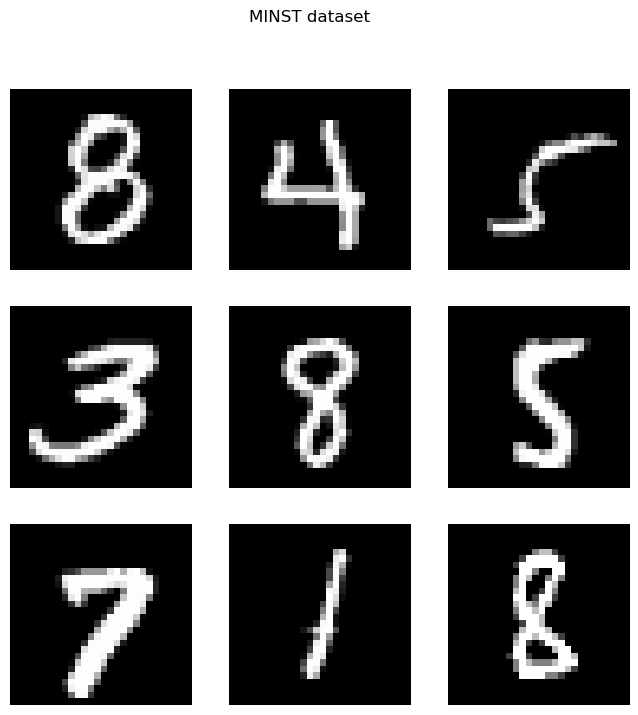

In [24]:
# just a quick plot to visualise the dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(base_images), size=(1,)).item()
    img, label = base_images[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
figure.suptitle("MINST dataset")
plt.show()

# Noise addition

Use the gaussian reparameterization trick, we can write $q$ as
\begin{align*}
    q(x_t|x_0)=\mathcal{N}(x_t;\sqrt{\bar{\alpha}}x_0,(1-\hat{\alpha}_t)I)=\sqrt{\bar{\alpha}}x_0+\sqrt{(1-\hat{\alpha}_t)}\epsilon
\end{align*}
where $\epsilon\sim N(0,1)$. This also gives some mathematical intuition behind what is happening. We can for instance notice that as $t$ grows the original image decays further and further until we only have white noise. 

In [18]:
#define epsilon
# since we know we are working with the MINST dataset, we have the dimension (1x28x28)
eps = torch.normal(0,1,(1,28,28))

# calculate alpha - this could be moved?
alphas = 1-betas

tensor([0.9999, 0.9999, 0.9999, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998, 0.9997,
        0.9997, 0.9997, 0.9997, 0.9997, 0.9996, 0.9996, 0.9996, 0.9996, 0.9996,
        0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 0.9994, 0.9994, 0.9994, 0.9994,
        0.9994, 0.9993, 0.9993, 0.9993, 0.9993, 0.9993, 0.9992, 0.9992, 0.9992,
        0.9992, 0.9992, 0.9991, 0.9991, 0.9991, 0.9991, 0.9991, 0.9990, 0.9990,
        0.9990, 0.9990, 0.9990, 0.9989, 0.9989, 0.9989, 0.9989, 0.9989, 0.9988,
        0.9988, 0.9988, 0.9988, 0.9988, 0.9987, 0.9987, 0.9987, 0.9987, 0.9987,
        0.9986, 0.9986, 0.9986, 0.9986, 0.9986, 0.9985, 0.9985, 0.9985, 0.9985,
        0.9985, 0.9984, 0.9984, 0.9984, 0.9984, 0.9984, 0.9983, 0.9983, 0.9983,
        0.9983, 0.9983, 0.9982, 0.9982, 0.9982, 0.9982, 0.9982, 0.9981, 0.9981,
        0.9981, 0.9981, 0.9981, 0.9980, 0.9980, 0.9980, 0.9980, 0.9980, 0.9979,
        0.9979, 0.9979, 0.9979, 0.9979, 0.9978, 0.9978, 0.9978, 0.9978, 0.9978,
        0.9977, 0.9977, 0.9977, 0.9977, 

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

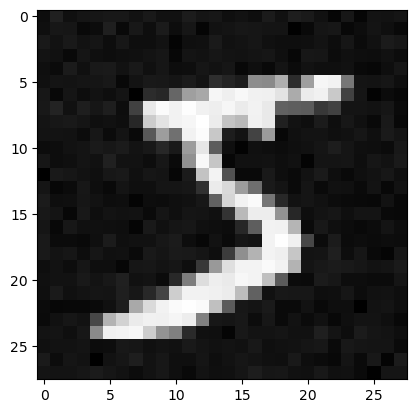

In [39]:
# allows us to test different time intervals - can be used for visualisation etc.
t = 5
alpha_bar = torch.prod(alphas[:t])

test_image, l = base_images[0]

x_t = torch.sqrt(alpha_bar)*test_image + torch.sqrt(1-alpha_bar)*eps

display(test_image)

plt.imshow(x_t.squeeze(),cmap="gray")

# TODO: add more visualisations, noise every image, etc.

# U-net construction, training